# Stationary diffusion equation:

In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import bicg, gmres, spsolve, bicgstab

import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import SDE as sde

## Problem:

$-d_x\dfrac{\partial^2 C}{\partial x^2} -d_y\dfrac{\partial^2 C}{\partial y^2} = f$


$ C\vert_{Г_D} = g_{D}$


$-\mathscr{D}\dfrac{\partial C}{\partial n}\vert_{Г_N} = g_{N}$


$Actual solution:  C = sin(\pi x)cos(\pi y)$ $->$ helps to find: $f ,  g_{D} ,  g_{N}$


$\mathscr{D} = \begin{pmatrix} d_x & 0 \\ 0 & d_y \end{pmatrix}$

## Functions of the right side and boundary D&N conditions:

In [2]:
def f(x, y, eps):
    """ Right side """
    return np.pi**2 * np.cos(np.pi * y) * np.sin(np.pi * x) * (1 + eps)

def g_d(x, y):
    """ Dirichlet condition function """
    if y == 0:
        return np.sin(np.pi * x)
    if x == 0:
        return 0.0
    assert False # catch problems
    
def g_n(x, y):
    """ Newman condition function """
    if x == 1:
        return np.pi * np.cos(np.pi * y)
    if y == 1:
        return 0.0
    assert False # catch problems

## Solution:

### Eps = 1; order = 2:

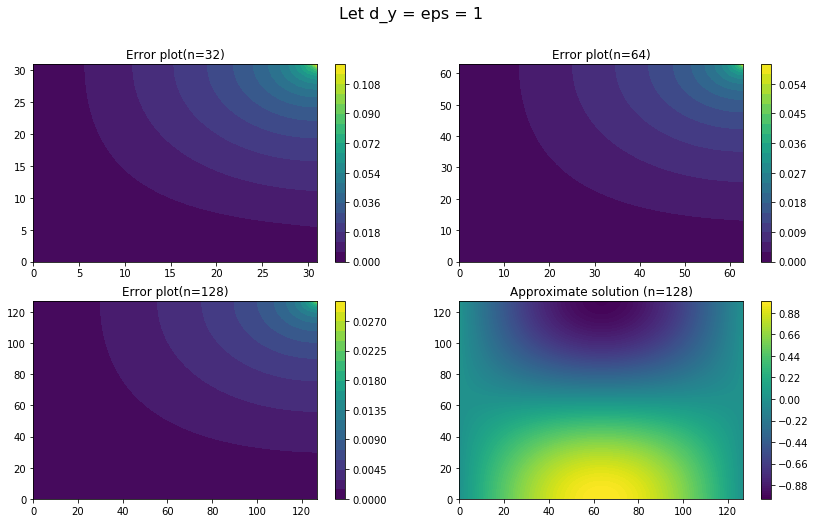

In [3]:
sde.plot(
    f,
    g_d,
    g_n,
    eps=1,
    solver=sde.SDE2,
    mode=2,
    n=[32, 64, 128],
    to="Report/pictures/plot(1).png",
)

### Eps = 10; order = 2:

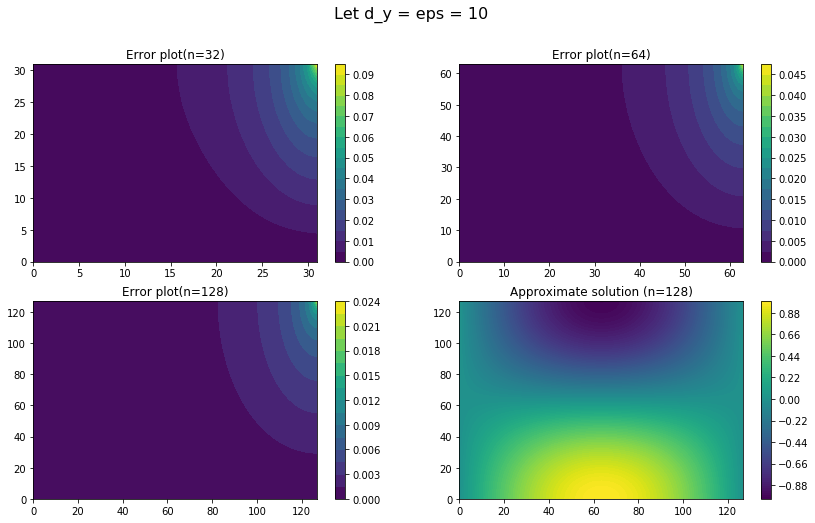

In [5]:
sde.plot(
    f,
    g_d,
    g_n,
    eps=10,
    solver=sde.SDE2,
    mode=2,
    n=[32, 64, 128],
    to="Report/pictures/plot(10).png",
)

### Eps = 100; order = 2:

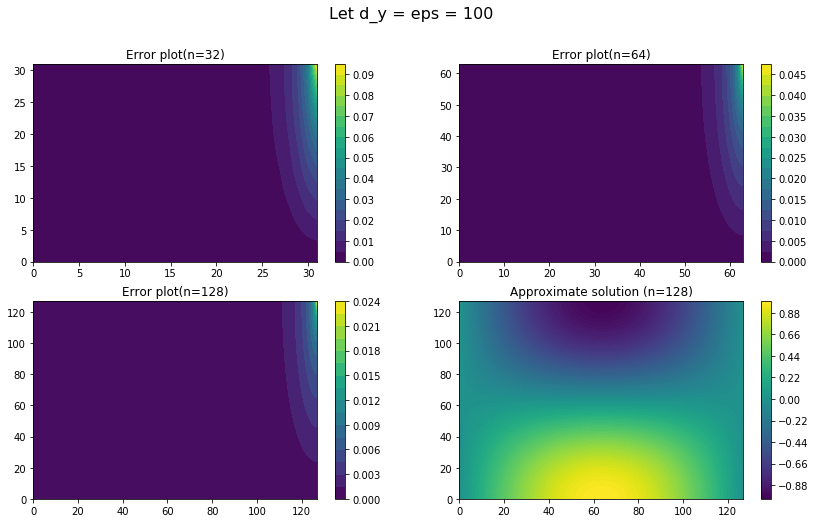

In [6]:
sde.plot(
    f,
    g_d,
    g_n,
    eps=100,
    solver=sde.SDE2,
    mode=2,
    n=[32, 64, 128],
    to="Report/pictures/plot(100).png",
)

### Eps = 100; order = 1:

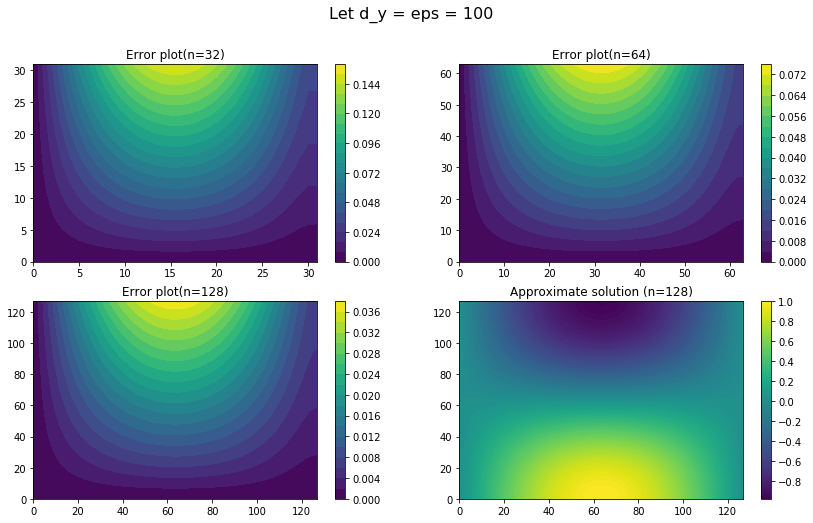

In [7]:
sde.plot(
    f,
    g_d,
    g_n, 
    eps=100,
    solver=sde.SDE,
    mode=2, 
    n=[32, 64, 128],
    to="Report/pictures/plot(100_1).png",
)

## Let us find number of iterations and norms:

In [8]:
actor = sde.Act(f, g_d, g_n)

### Eps = 1, order 2:

In [9]:
actor.act_norms(
    sde.SDE2, eps=1,
    n=32, mode=2, 
    tol=1e-08, maxiter=532
)

Iterations number:  532
Ch norm = 0.11618432735979826;
L2h norm = 0.003930038096506805


In [10]:
actor.act_norms(
    sde.SDE2, eps=1,
    n=64, mode=2, 
    tol=1e-08, maxiter=1325
)

Iterations number:  1325
Ch norm = 0.05889784027044817;
L2h norm = 0.0017378138088546158


In [11]:
actor.act_norms(
    sde.SDE2, eps=1,
    n=128, mode=2, 
    tol=1e-08, maxiter=3020
)

Iterations number:  3020
Ch norm = 0.029907917069464003;
L2h norm = 0.0007847950308191626


### Eps = 10, order 2:

In [12]:
actor.act_norms(
    sde.SDE2, eps=10,
    n=32, mode=2, 
    tol=1e-08, maxiter=846
)

Iterations number:  846
Ch norm = 0.09188159192149005;
L2h norm = 0.002477336049492752


In [13]:
actor.act_norms(
    sde.SDE2, eps=10,
    n=64, mode=2, 
    tol=1e-08, maxiter=2610
)

Iterations number:  2610
Ch norm = 0.046285221542374674;
L2h norm = 0.0010616249142930438


In [14]:
actor.act_norms(
    sde.SDE2, eps=10,
    n=128, mode=2, 
    tol=1e-08, maxiter=8100
)

Iterations number:  8100
Ch norm = 0.023377558705458996;
L2h norm = 0.000468330225203735


### Eps = 100, order 2:

In [15]:
actor.act_norms(
    sde.SDE2, eps=100,
    n=32, mode=2, 
    tol=1e-08, maxiter=1470
)

Iterations number:  1470
Ch norm = 0.09359965874176246;
L2h norm = 0.0018801455410274509


In [16]:
actor.act_norms(
    sde.SDE2, eps=100,
    n=64, mode=2, 
    tol=1e-08, maxiter=5391
)

Iterations number:  5391
Ch norm = 0.04676102357677361;
L2h norm = 0.0007643838973839743


In [17]:
actor.act_norms(
    sde.SDE2, eps=100,
    n=128, mode=2, 
    tol=1e-08, maxiter=21200
)

Iterations number:  21200
Ch norm = 0.023444186028358936;
L2h norm = 0.0003246803937390578


### Eps = 100, order 1:

In [18]:
actor.act_norms(
    sde.SDE, eps=100,
    n=32, mode=2, 
    tol=1e-08, maxiter= 819
)

Iterations number:  819
Ch norm = 0.15253376257806395;
L2h norm = 0.01580112007916443


In [19]:
actor.act_norms(
    sde.SDE, eps=100,
    n=64, mode=2, 
    tol=1e-08, maxiter=2090
)

Iterations number:  2090
Ch norm = 0.07548625083329807;
L2h norm = 0.007792133530906151


In [20]:
actor.act_norms(
    sde.SDE, eps=100,
    n=128, mode=2, 
    tol=1e-08, maxiter=6505
)

Iterations number:  6505
Ch norm = 0.0375412001645713;
L2h norm = 0.0038699909645816735
